# 10 - Project // Classification with Hidden Features

https://github.com/ad3rinto/data-science-rune/blob/main/10%20-%20Project%20-%20Classification.ipynb

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ad3rinto/data-science-rune/main/files/classified_data.csv')
data['Unnamed: 0']=data.index+1
data = data.rename(columns={'Unnamed: 0': 'No'})
data = data.set_index('No')
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
No,,,,,,,,,,,
1,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
2,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
3,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
4,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
5,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
data.shape

(1000, 12)

In [ ]:
data['TARGET CLASS'].value_counts()

TARGET CLASS
1    500
0    500
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [ ]:
data.isnull().any()

No              False
WTT             False
PTI             False
EQW             False
SBI             False
LQE             False
QWG             False
FDJ             False
PJF             False
HQE             False
NXJ             False
TARGET CLASS    False
dtype: bool

In [ ]:
X = data.drop(['TARGET CLASS'], axis=1)
y = data['TARGET CLASS']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.955

In [ ]:
perm_importance = permutation_importance(svc, X_test, y_test)
perm_importance.importances_mean

array([0.03 , 0.015, 0.084, 0.001, 0.01 , 0.011, 0.006, 0.051, 0.087,
       0.   ])

<Axes: >

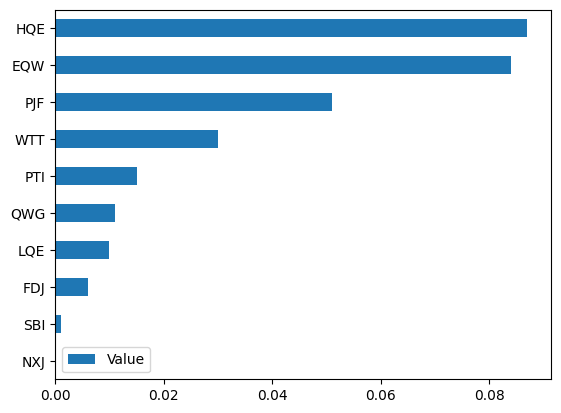

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
df.plot.barh()

In [ ]:
data.corr()['TARGET CLASS'].sort_values(ascending=False)

TARGET CLASS    1.000000
HQE             0.643989
WTT             0.551394
SBI             0.028874
NXJ            -0.111730
LQE            -0.205043
FDJ            -0.214885
QWG            -0.327664
PTI            -0.468748
PJF            -0.571483
EQW            -0.598120
Name: TARGET CLASS, dtype: float64

In [ ]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)
accuracy_score(y_test, y_pred)

0.955

In [ ]:
perm_importance = permutation_importance(kn, X_test, y_test)
perm_importance.importances_mean

array([0.046, 0.037, 0.081, 0.008, 0.014, 0.024, 0.005, 0.069, 0.086,
       0.003])

<Axes: >

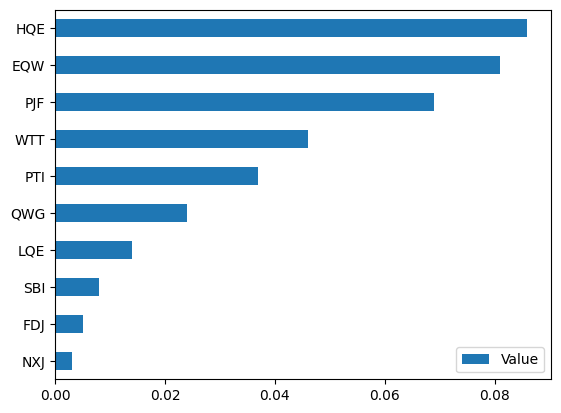

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
df.plot.barh()